In [1]:
# ======
# Cambiar legend del primer plot
# Cambiar el tipo de corte
# Elegir el span
# Cambiar el rango del eje x
# Cambiar nombre de histograma
# ======
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import os
rc('text', usetex=True)
rc('font', family='serif')
% matplotlib inline

In [3]:
ab = str(raw_input("Model: "))
model = ab + "_millennium"
path = "/home/esteban/Escritorio/Practica/Data/" + model
os.chdir( path )

Model: G13


In [4]:
# Archivo con información de todos los halos (usando una muestra de densidad 10^-2 y con corte en sfr)
halos_data = np.load('halos_sfrcut_2.0.npy')

#fofid = halos_data[:,0]         # Halo's fofid
logmass = halos_data[:,1]       # Halo's log mass
All = halos_data[:,2]           # Num of galaxies in the halo
Cent = halos_data[:,3]          # Num of Cent in the halo
#Sats = halos_data[:,4]          # Num of Sats in the halo
#x = halos_data[:,5]             # Halo x-position 

In [6]:
# Archivo con los datos del HOD usando el corte correspondiente
d = 2.0 ##############
cut = 'SFR/' ################
if cut == 'Stellar Mass/': tc = 'Mstell'
else: tc = 'SFR'   
    
hod_path = path + '/hod_data/' + cut
bins, HOD, Cent_plot, Sats_plot = np.loadtxt(hod_path + 'hod_%.1f' %d, unpack=True)
Dmin, Dmax = 10,15.
NBIN = 30
bin_width = (Dmax-Dmin)/NBIN
bins_left = bins - bin_width *.5

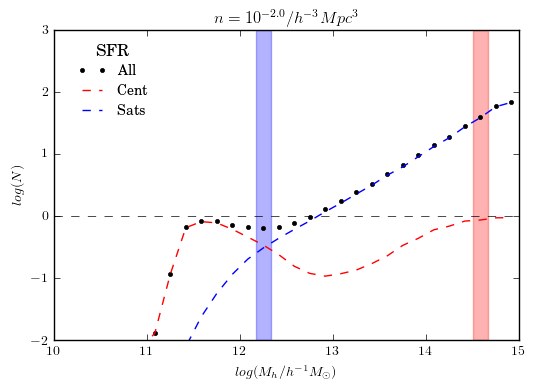

In [10]:
# Rangos a analizar 
spn1_l, spn1_r = bins_left[13], bins_left[14]
spn2_l, spn2_r = bins_left[-3], bins_left[-2]
mask1 = (logmass > spn1_l) & (logmass < spn1_r) # Span 1
mask2 = (logmass > spn2_l) & (logmass < spn2_r) # Span 2

f = plt.figure(figsize = [6,4])
plt.axhline(y = 0, color = 'black', linestyle='--', lw = .5)
plt.plot(bins, HOD, 'k.', label = 'All')
plt.plot(bins, Cent_plot, 'r--', label = 'Cent')
plt.plot(bins, Sats_plot, 'b--', label = 'Sats')
plt.axvspan(xmin=spn1_l,xmax=spn1_r,color='b',alpha=.3)
plt.axvspan(xmin=spn2_l,xmax=spn2_r,color='r',alpha=.3)
plt.xlabel(r"$log(M_h / h^{-1}M_{\odot})$", fontsize = 10)
plt.xlabel(r"$log(M_h / h^{-1}M_{\odot})$", fontsize = 10)
plt.title(r"$n = 10^{-%.1f} /h^{-3} Mpc^3$" %d)
plt.ylabel(r"$log(N)$", fontsize = 10)
plt.ylim(-2, 3)
plt.legend(loc = (.04,.7),title = r"\large{%s}" %cut[:-1], frameon = False, prop={'size':10})
#plt.annotate(r"\large{\textbf{SFR}}", xy=(.05,.9), xycoords='axes fraction' )
#plt.ylim(-2, 3)
path = "/home/esteban/Escritorio/Practica/Plots/" + model
os.chdir( path )
f.savefig("%s_spans_selected.pdf" %tc)

In [11]:
# Seleccionamos los halos que se encuentran dentro de estos spans
All_span1, Cent_span1 = All[mask1], Cent[mask1]   
All_span2, Cent_span2 = All[mask2], Cent[mask2]

# Eliminamos los halos que no tienen galaxias (ya que ninguna de sus galaxias 
# cumple con el criterio de sfr)
mask_zeros1 = All_span1 == 0
mask_zeros2 = All_span2 == 0

#All_span1, Cent_span1 = All_span1[~mask_zeros1], Cent_span1[~mask_zeros1]
#All_span2, Cent_span2 = All_span2[~mask_zeros2], Cent_span2[~mask_zeros2]   

# Halos without central
mask_nocent1 = Cent_span1 == 0
mask_nocent2 = Cent_span2 == 0

Span1_nocent, Span1_cent = All_span1[mask_nocent1], All_span1[~mask_nocent1]
Span2_nocent, Span2_cent = All_span2[mask_nocent2], All_span2[~mask_nocent2]

# To Do:
# Done / Make two plots, the first with the halos without central and the other one with the halos that have centrals
# Done / Have the plots for stellarmass and sfr
# Done / Add a vertical line that shows the mean of the distribution
# Done / What is the range of mass that I've plotted?

In [13]:
bins_span2 = np.arange(150,200)
print min(Span1_nocent), min(Span1_cent), max(Span1_cent)
print min(Span2_cent), max(Span2_cent), min(Span2_nocent), max(Span2_nocent)
print bins_span2

0.0 1.0 6.0
19.0 81.0 21.0 69.0
[150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199]


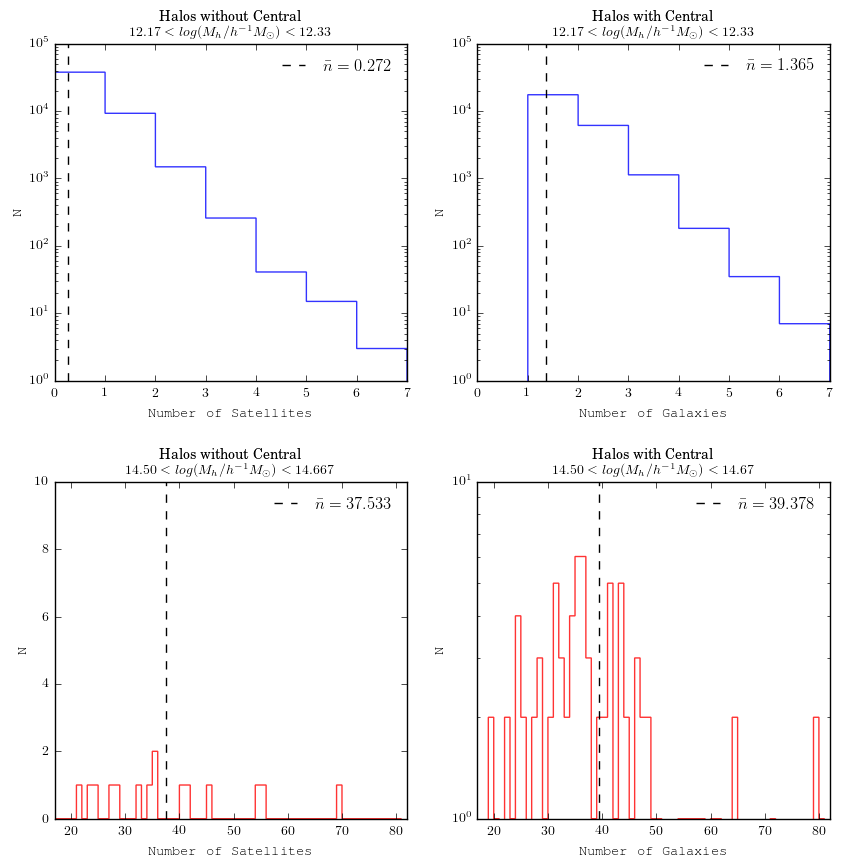

In [16]:
f, ax = plt.subplots(nrows=2, ncols=2, figsize = [10,10])

bins_span1 = np.arange(10)
bins_span2 = np.arange(17, 82)
nn = np.zeros(4)

n = ax[0,0].hist(Span1_nocent, bins = bins_span1, alpha=.8, color = 'b', histtype = 'step')
if np.sum(n[0]) != 0:
    mean = np.sum(n[0] * n[1][:len(bins_span1)-1])/np.sum(n[0])
    ax[0,0].axvline(x = mean, color = 'k', linestyle = '--', label = r"$\bar n = %.3f$" %mean)
    ax[0,0].set_yscale('log')
ax[0,0].set_title("Halos without Central \n $ %.2f<log(M_h / h^{-1}M_{\odot})<%.2f$" %(spn1_l, spn1_r), fontsize = 10)
ax[0,0].set_xlabel(r"\tt{Number of Satellites }", fontsize = 10)

n = ax[0,1].hist(Span1_cent, bins = bins_span1, alpha = .8, color = 'b', histtype = 'step')
if np.sum(n[0]) != 0:
    mean = np.sum(n[0] * n[1][:len(bins_span1)-1])/np.sum(n[0])
    ax[0,1].axvline(x = mean, color = 'k', linestyle = '--', label = r"$\bar n = %.3f$" %mean)
    ax[0,1].set_yscale('log')
ax[0,1].set_title("Halos with Central \n $ %.2f<log(M_h / h^{-1}M_{\odot})<%.2f$" %(spn1_l, spn1_r), fontsize = 10)
ax[0,1].set_xlabel(r"\tt{Number of Galaxies }", fontsize = 10)

n = ax[1,0].hist(Span2_nocent, bins = bins_span2, alpha = .8, color = 'red', histtype = 'step')
if np.sum(n[0]) != 0:
    mean = np.sum(n[0] * n[1][:len(bins_span2)-1])/np.sum(n[0])
    ax[1,0].axvline(x = mean, color = 'k', linestyle = '--', label = r"$\bar n = %.3f$" %mean)
    #ax[1,0].set_yscale('log')
ax[1,0].set_title("Halos without Central \n $ %.2f<log(M_h / h^{-1}M_{\odot})<%.3f$" %(spn2_l, spn2_r), fontsize = 10)
ax[1,0].set_xlabel(r"\tt{Number of Satellites }", fontsize = 10)

n = ax[1,1].hist(Span2_cent, bins = bins_span2, alpha = .8, color = 'red', histtype = 'step')
if np.sum(n[0]) != 0:
    mean = np.sum(n[0] * n[1][:len(bins_span2)-1])/np.sum(n[0])
    ax[1,1].axvline(x = mean, color = 'k', linestyle = '--', label = r"$\bar n = %.3f$" %mean)
    ax[1,1].set_yscale('log')
ax[1,1].set_title("Halos with Central \n $ %.2f<log(M_h / h^{-1}M_{\odot})<%.2f$" %(spn2_l, spn2_r), fontsize = 10)
ax[1,1].set_xlabel(r"\tt{Number of Galaxies }", fontsize = 10)

for row in ax:
    for col in row:
        col.set_ylabel(r"\tt{N}", fontsize = 10)
        col.legend(frameon=False)

ax[0,0].set_xlim(0,7)
ax[0,1].set_xlim(0,7)         
#ax[0,0].set_xlim(0,7)
#ax[0,1].set_xlim(0,7)  
#ax[0,0].set_ylim(1e0, 1e6)
#ax[0,1].set_ylim(1e0, 1e6)
#ax[1,0].set_xlim(0,20)
#ax[1,1].set_xlim(0,20)
ax[1,0].set_xlim(17,82)
ax[1,1].set_xlim(17,82)
#ax[1,0].set_xlim(0,60)
#ax[1,1].set_xlim(0,60)
#ax[1,0].set_xlim(38,150)
#ax[1,1].set_xlim(38,150)
ax[1,0].set_ylim(0, 10)
ax[1,1].set_ylim(1e0, 1e1)
f.subplots_adjust(hspace=.3)
f.savefig("histograms_%s.pdf" %tc)